## Set up libraries

In [1]:
import os

import numpy as np  
import pandas as pd

import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py

#os.getcwd()

###### Read Big Mac raw data

In [2]:
big_mac_raw_df=pd.read_csv('big-mac-full-index.csv', parse_dates=['date'])

###### Display data basic info

In [3]:
big_mac_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 19 columns):
date             1106 non-null datetime64[ns]
iso_a3           1106 non-null object
currency_code    1106 non-null object
name             1106 non-null object
local_price      1106 non-null float64
dollar_ex        1106 non-null float64
dollar_price     1106 non-null float64
USD_raw          1106 non-null float64
EUR_raw          1106 non-null float64
GBP_raw          1106 non-null float64
JPY_raw          1106 non-null float64
CNY_raw          1106 non-null float64
GDP_dollar       517 non-null float64
adj_price        517 non-null float64
USD_adjusted     517 non-null float64
EUR_adjusted     517 non-null float64
GBP_adjusted     517 non-null float64
JPY_adjusted     517 non-null float64
CNY_adjusted     517 non-null float64
dtypes: datetime64[ns](1), float64(15), object(3)
memory usage: 164.2+ KB


In [4]:
big_mac_raw_df.head(5)

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
0,2000-04-01,ARG,ARS,Argentina,2.50,1.00,2.500000,-0.004,0.050,-0.167,-0.099,1.091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-04-01,AUS,AUD,Australia,2.59,1.68,1.541667,-0.386,-0.352,-0.486,-0.444,0.289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-04-01,BRA,BRL,Brazil,2.95,1.79,1.648045,-0.343,-0.308,-0.451,-0.406,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,CAN,CAD,Canada,2.85,1.47,1.938776,-0.228,-0.186,-0.354,-0.301,0.622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.70,3.470588,0.383,0.458,0.156,0.251,1.903,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
big_mac_raw_df.describe()

,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
count,1.106000e+03,1.106000e+03,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,1.199506e+04,4.577227e+03,3.189757,-0.193418,-0.230759,-0.185712,0.050781,0.573828,25613.376689,3.705238,0.015822,-0.072435,0.021791,0.254002,0.064520
std,2.030382e+05,7.754124e+04,1.301531,0.309909,0.283996,0.310260,0.409664,0.658915,22822.147906,0.995483,0.268998,0.220080,0.258413,0.324372,0.268173
min,1.880000e+00,4.966106e-01,0.639966,-0.779000,-0.805000,-0.810000,-0.724000,-0.566000,1049.749000,2.327804,-0.578000,-0.583000,-0.590000,-0.457000,-0.555000
25%,7.000000e+00,2.872875e+00,2.289429,-0.423000,-0.442750,-0.410750,-0.262750,0.101500,7935.716000,2.936283,-0.148000,-0.209000,-0.136000,0.019000,-0.104000
50%,2.100000e+01,7.641250e+00,2.926817,-0.250000,-0.277500,-0.250500,0.000000,0.436000,14411.495000,3.329650,0.000000,-0.086000,0.000000,0.215000,0.050000
75%,1.130000e+02,4.633250e+01,3.955842,-0.031250,-0.061500,0.000000,0.249250,0.887000,42210.132000,4.420180,0.132000,0.038000,0.152000,0.426000,0.183000
max,4.000000e+06,1.600500e+06,8.311708,1.273000,0.871000,1.136000,2.160000,4.386000,100578.968000,7.434129,1.485000,0.823000,1.286000,1.621000,1.405000


In [6]:
big_mac_raw_df['date'].value_counts().keys().sort_values(ascending=False)

DatetimeIndex(['2018-01-01', '2017-07-01', '2017-01-01', '2016-07-01',
               '2016-01-01', '2015-07-01', '2015-01-01', '2014-07-01',
               '2014-01-01', '2013-07-01', '2013-01-01', '2012-07-01',
               '2012-01-01', '2011-07-01', '2010-07-01', '2010-01-01',
               '2009-07-01', '2008-06-01', '2007-06-01', '2007-01-01',
               '2006-05-01', '2006-01-01', '2005-06-01', '2004-05-01',
               '2003-04-01', '2002-04-01', '2001-04-01', '2000-04-01'],
              dtype='datetime64[ns]', freq=None)

In [7]:
big_mac_raw_df['name'].value_counts(dropna=False)

Sweden            28
Euro area         28
Singapore         28
Hong Kong         28
Japan             28
Switzerland       28
Poland            28
Hungary           28
Malaysia          28
Australia         28
Taiwan            28
Britain           28
Czech Republic    28
United States     28
Canada            28
Chile             28
Mexico            28
Russia            28
South Africa      28
Denmark           28
China             28
Thailand          28
Argentina         28
New Zealand       28
South Korea       28
Indonesia         28
Brazil            28
Philippines       27
Turkey            26
Egypt             25
Peru              25
Norway            24
Pakistan          23
Sri Lanka         23
Ukraine           23
Uruguay           23
Colombia          23
Saudi Arabia      23
Costa Rica        22
UAE               22
Israel            19
India             14
Vietnam            8
Name: name, dtype: int64

In [8]:
big_mac_2016_df = (big_mac_raw_df.loc[big_mac_raw_df['date'] == '2016-01-01'])
big_mac_2016_df= big_mac_2016_df.set_index('iso_a3')
big_mac_2016_df = big_mac_2016_df.drop(big_mac_2016_df.columns[range(5,18)], axis='columns')
big_mac_2016_df = big_mac_2016_df.drop('date', axis='columns')


In [1]:
price_usd=big_mac_2016_df[big_mac_2016_df.name == 'United States'].local_price[0]

NameError: name 'big_mac_2016_df' is not defined

In [9]:
big_mac_2016_df['local price in dollars']=big_mac_2016_df['local_price']/big_mac_2016_df['dollar_ex']
big_mac_2016_df['difference_percentage']=(price_usd-big_mac_2016_df['local price in dollars'])/price_usd
big_mac_2016_df.head(5)


,currency_code,name,local_price,dollar_ex,local price in dollars,difference_percentage
iso_a3,,,,,,
ARE,AED,UAE,13.00,3.673100,3.539245,0.282100
ARG,ARS,Argentina,33.00,13.809250,2.389703,0.515273
AUS,AUD,Australia,5.30,1.415729,3.743655,0.240638
BRA,BRL,Brazil,13.50,4.024800,3.354204,0.319634
CAN,CAD,Canada,5.84,1.409200,4.144195,0.159392


In [10]:
big_mac_2016_df.loc[big_mac_2016_df['difference_percentage'].idxmax()]

currency_code                  RUB
name                        Russia
local_price                    114
dollar_ex                   74.655
local price in dollars     1.52702
difference_percentage     0.690259
Name: RUS, dtype: object

In [11]:
big_mac_2016_df.loc[big_mac_2016_df['difference_percentage'].idxmin()]

currency_code                     CHF
name                      Switzerland
local_price                       6.5
dollar_ex                      1.0088
local price in dollars         6.4433
difference_percentage       -0.306957
Name: CHE, dtype: object

# Read in arrivals and expenditure data

In [12]:
arrivals_df=pd.read_csv('international_arrivals.csv', skiprows=4)
#arrivals_df.info()

In [13]:
arrivals_df = arrivals_df.dropna(axis='columns', thresh=215)
arrivals_df = arrivals_df.drop(arrivals_df.columns[range(2,4)], axis='columns')
#arrivals_df.head(5)

In [14]:
expenditures_df=pd.read_csv('international_expenditures.csv', skiprows=4)
#expenditures_df.info()

In [15]:
expenditures_df =expenditures_df.dropna(axis='columns', thresh=198)
expenditures_df = expenditures_df.drop(expenditures_df.columns[range(2,4)], axis='columns')
#expenditures_df.head(5)

In [16]:
arrivals_df.set_index('Country Code', inplace=True)
expenditures_df.set_index('Country Code', inplace=True)

In [17]:
arrivals_df['delta_2016']=arrivals_df['2016']-arrivals_df['2015']
arrivals_df['delta_2016_percent']=arrivals_df['delta_2016']/arrivals_df['2015']
expenditures_df['delta_2016']=expenditures_df['2016']-expenditures_df['2015']
expenditures_df['delta_2016_percent']=expenditures_df['delta_2016']/expenditures_df['2015']
#arrivals_df[['Country Name','delta_2016']].head(4)
#expenditures_df[['Country Name','delta_2016']].head(4)

In [18]:
data_2016 =arrivals_df[['Country Name','delta_2016_percent']].merge(expenditures_df[['delta_2016_percent']],  how='inner', on='Country Code')
data_2016.rename(columns={'delta_2016_percent_x': 'Change in Arrivals', 'delta_2016_percent_y': 'Change in Expenditures'}, inplace=True)
data_2016.head(5)

,Country Name,Change in Arrivals,Change in Expenditures
Country Code,,,
ABW,Aruba,-0.100408,-0.070028
AFG,Afghanistan,NaN,-0.352941
AGO,Angola,-0.329392,1.115681
ALB,Albania,0.075581,0.020595
AND,Andorra,0.063087,NaN


# Let's look at 2016 Big Mac data

In [19]:
analysis_data_2016=big_mac_2016_df.merge(data_2016, how='left', left_index=True, right_index=True)
analysis_data_2016.drop(analysis_data_2016.columns[6], axis='columns', inplace=True)
analysis_data_2016.set_index('name', inplace=True)
#analysis_data_2016.head(5)

In [20]:
#tips = analysis_data_2016.reset_index()
analysis_data_2016["difference_percentage"].describe()

count    43.000000
mean      0.350955
std       0.216014
min      -0.306957
25%       0.223535
50%       0.376259
75%       0.507346
max       0.690259
Name: difference_percentage, dtype: float64

In [21]:
bins = [-1, -0.1, 0.1, 0.3 ,1]
labels = ['Overvalued','Similar','Undervalued', 'Very Undervalued']
analysis_data_2016['Currency Valuation'] = pd.cut(analysis_data_2016['difference_percentage'], bins=bins, labels=labels)
analysis_data_2016.head()

,currency_code,local_price,dollar_ex,local price in dollars,difference_percentage,Change in Arrivals,Change in Expenditures,Currency Valuation
name,,,,,,,,
UAE,AED,13.00,3.673100,3.539245,0.282100,NaN,0.029452,Undervalued
Argentina,ARS,33.00,13.809250,2.389703,0.515273,-0.030858,0.254707,Very Undervalued
Australia,AUD,5.30,1.415729,3.743655,0.240638,0.110021,0.040330,Undervalued
Brazil,BRL,13.50,4.024800,3.354204,0.319634,0.043134,-0.161525,Very Undervalued
Canada,CAD,5.84,1.409200,4.144195,0.159392,0.103111,-0.200665,Undervalued


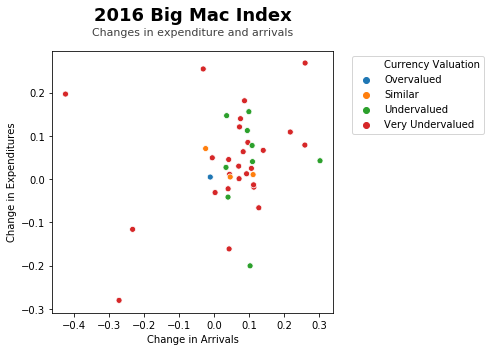

In [22]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot( x="Change in Arrivals", y="Change in Expenditures", 
           data=analysis_data_2016.reset_index(), 
           legend='brief', 
           hue="Currency Valuation", ax=ax)

ax.text(x=0.5, y=1.1, s='2016 Big Mac Index', fontsize=18, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Changes in expenditure and arrivals', fontsize=11, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
          
h,l = ax.get_legend_handles_labels()
ax.legend(h,l, bbox_to_anchor=(1.05, 1), loc=2)

fig.tight_layout()
plt.show()
